In [50]:
import os
import random
from collections import defaultdict

import matplotlib.pyplot as plt
%matplotlib inline

from graph import *
import utils

## Helper functions for testing search algorithms


In [51]:
def generate_test_graphs():
    test_graphs = []

    for node_count in [10, 20, 30, 40]:
        for edge_probability in [0.2, 0.4, 0.6, 0.8]:
            graph = utils.generate_graph(
                node_count, edge_probability, min_weight=1, max_weight=100)
            test_graphs.append(graph)

    return test_graphs


def generate_search_problems(graph):
    # Randomly selects 5 nodes from graph and pairs all of them them to create search problem
    # returns 45 pairs

    selected_nodes = random.sample(graph.nodes, k=5)

    start_end_nodes = []

    for i in range(len(selected_nodes)):
        for j in range(i + 1, len(selected_nodes)):
            start_end_nodes.append((selected_nodes[i], selected_nodes[j]))

    return start_end_nodes

In [52]:
def test_performance(run_n_times=5):
    # generate test graph
    test_graphs = generate_test_graphs()

    # search algorithms to test
    search_algorithms = [(depth_first_search, {}),
                         (breadth_first_search, {}),
                         (uniform_cost_search, {}),
                         (iterative_deepening, {"max_depth_limit": 100}),
                         (greedy_search, {"heuristic_func": None}),
                         (a_star_search, {"heuristic_func": None})]

    # track algorithm performance
    algorithm_performance = {depth_first_search: [],
                             breadth_first_search: [],
                             uniform_cost_search: [],
                             iterative_deepening: [],
                             greedy_search: [],
                             a_star_search: []}

    for graph in test_graphs:
        search_problems = generate_search_problems(graph)

        for algorithm, args in search_algorithms:

            algorithm_running_time = 0

            for start_node, goal_node in search_problems:
                # generate heuristic function for this search problem
                heuristic_function = utils.generate_heuristic_function(
                    graph, goal_node=goal_node)

                if "heuristic_func" in args:
                    args.update(
                        {
                            "graph": graph,
                            "start_node": start_node,
                            "end_node": goal_node,
                            "heuristic_func": heuristic_function
                        }
                    )

                else:
                    args.update(
                        {
                            "graph": graph,
                            "start_node": start_node,
                            "end_node": goal_node
                        }
                    )

                runtime, path_length = utils.benchmark(
                    algorithm, args, run_n_times=run_n_times)
                algorithm_running_time += runtime

                algorithm_performance[algorithm].append(
                    {
                        "start": start_node,
                        "end": goal_node,
                        "node_count": len(graph.nodes),
                        "runtime": algorithm_running_time,
                        "path_length": path_length
                    }
                )

    return algorithm_performance

## Run tests

In [53]:
performance_report = test_performance(run_n_times=5)

In [54]:
# performance_report

In [55]:
average_performance = {}

for algorithm, samples in performance_report.items():
    
    average_alg_performance = defaultdict(lambda : [0, 0, 0])
    
    for sample in samples:
        node_count  = sample['node_count']
        path_length = sample['path_length']
        runtime     = sample['runtime']

        average_alg_performance[node_count][0] += path_length
        average_alg_performance[node_count][1] += runtime
        average_alg_performance[node_count][2] += 1
    
    average_performance[algorithm] = average_alg_performance

# average_performance

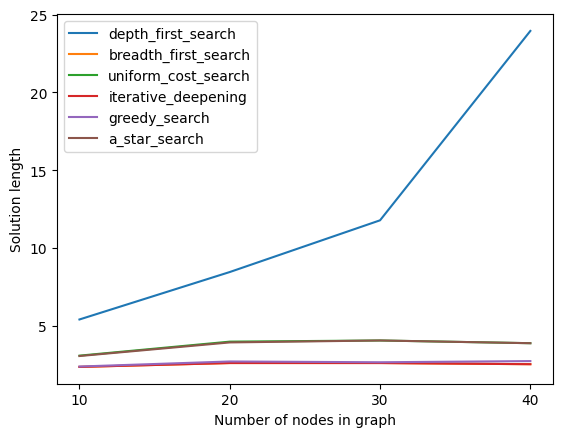

In [56]:
for alg in average_performance.keys():  
    number_of_nodes = []
    average_solution_lengths = []
    
    for n_nodes in average_performance[alg].keys(): 
        average = average_performance[alg][n_nodes][0] / average_performance[alg][n_nodes][2]
        average_solution_lengths.append(average)
        number_of_nodes.append(n_nodes)
    
    plt.plot(number_of_nodes, average_solution_lengths, label=alg.__name__)
    
    plt.xlabel("Number of nodes in graph")    
    plt.xticks(number_of_nodes)
     
    plt.ylabel("Solution length")
    plt.legend(loc="upper left")

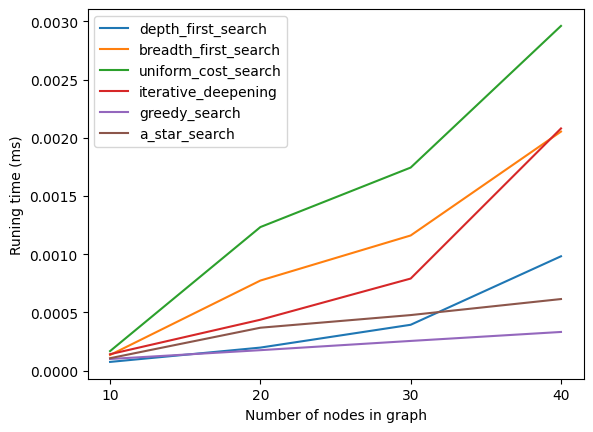

In [57]:
for alg in average_performance.keys():  
    number_of_nodes = []
    average_time_taken = []
    
    for n_nodes in average_performance[alg].keys(): 
        average = average_performance[alg][n_nodes][1] / average_performance[alg][n_nodes][2]
        average_time_taken.append(average)
        number_of_nodes.append(n_nodes)
    
    plt.plot(number_of_nodes, average_time_taken, label=alg.__name__)
    
    plt.xlabel("Number of nodes in graph")    
    plt.xticks(number_of_nodes)
    
    plt.ylabel("Runing time (ms)")    
        
    plt.legend(loc="upper left")